In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#import pacakges

In [148]:
df=pd.read_csv("dataexport.csv")

In [ ]:
#read dataexport.csv file into df data frame using pandas(pd)

In [149]:
df=df.drop('id',axis=1)

In [ ]:
#drop coulmn id because its not useful.these are only index values against each record.

In [150]:
df.datetime = pd.to_datetime(df.datetime)
df.set_index('datetime', inplace=True)

In [ ]:
#declare datetime cloumn to index column. We will use it to process our dataframe(dataset) on the basis of time.

In [151]:
df.describe()

,open,equity_id
count,289179.000000,289179.000000
mean,208.884265,6.001746
std,36.531082,4.084660
min,147.880000,1.000000
25%,171.400000,1.000000
50%,220.100000,6.000000
75%,241.880000,11.000000
max,275.310000,11.000000


In [ ]:
#our dataset properties for both columns.
#Count showing number of records, both column have same count.
#mean showing the mean of each column. open has bigger mean values beacuse its values changes on vide range.
#min are showing the minimum value.
#25%,50%,75% are the ranges where our dataset values are residing.
#max is the maximum value of each column.

In [152]:
df.columns.values

array(['open', 'equity_id'], dtype=object)

In [ ]:
#We have only two column (open, equity_id). 
#datetime column is not listed because we made it index clumn. but it still present in our dataset.
#we already removed id column.

In [153]:
print (df.head())

                       open  equity_id
datetime                              
2017-07-24 15:30:00  168.37         11
2017-07-24 15:31:00  167.90         11
2017-07-24 15:32:00  168.06         11
2017-07-24 15:33:00  167.98         11
2017-07-24 15:34:00  168.09         11


In [ ]:
#just to make sure the dataframe structure. datetime is indexd here that's why its heading is shwoing one step below.

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289179 entries, 2017-07-24 15:30:00 to 2018-07-27 22:00:00
Data columns (total 2 columns):
open         289179 non-null float64
equity_id    289179 non-null int64
dtypes: float64(1), int64(1)
memory usage: 6.6 MB


In [ ]:
#dataframe info
#289179 records
#two cloumns only
#open have non-null values(not a single empty vlaue). open datatype is float64
#equity_id have non-null values. its data type is int64.

In [155]:
df.isnull().sum()

open         0
equity_id    0
dtype: int64

In [ ]:
#Assuring we have zero null values in our dataset.

In [131]:
#Dataset have no missing values. All coulmns have zero status for missing values

In [156]:
df.open.unique()

array([168.37  , 167.9   , 168.06  , ..., 252.3601, 252.2664, 252.455 ])

In [158]:
#In Open weh have values from 168.37 to 252. These are the boundaries of our unique values in the data

In [157]:
df.equity_id.unique()

array([11,  6,  1], dtype=int64)

In [159]:
#In equity_id our values range is small. we have only three unique values in equity_id column.

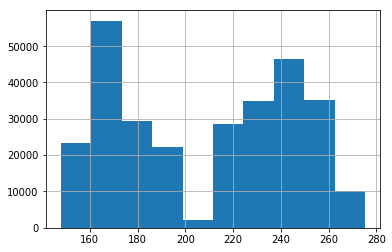

In [160]:
df.open.hist()

In [133]:
#This histogram is showing the number of occurance of open values. Most trending values is 160 to 180. 
#It goes from 200 to 220 for very short time.
#it remain consistant from 220 to 260 for a reasonable time.

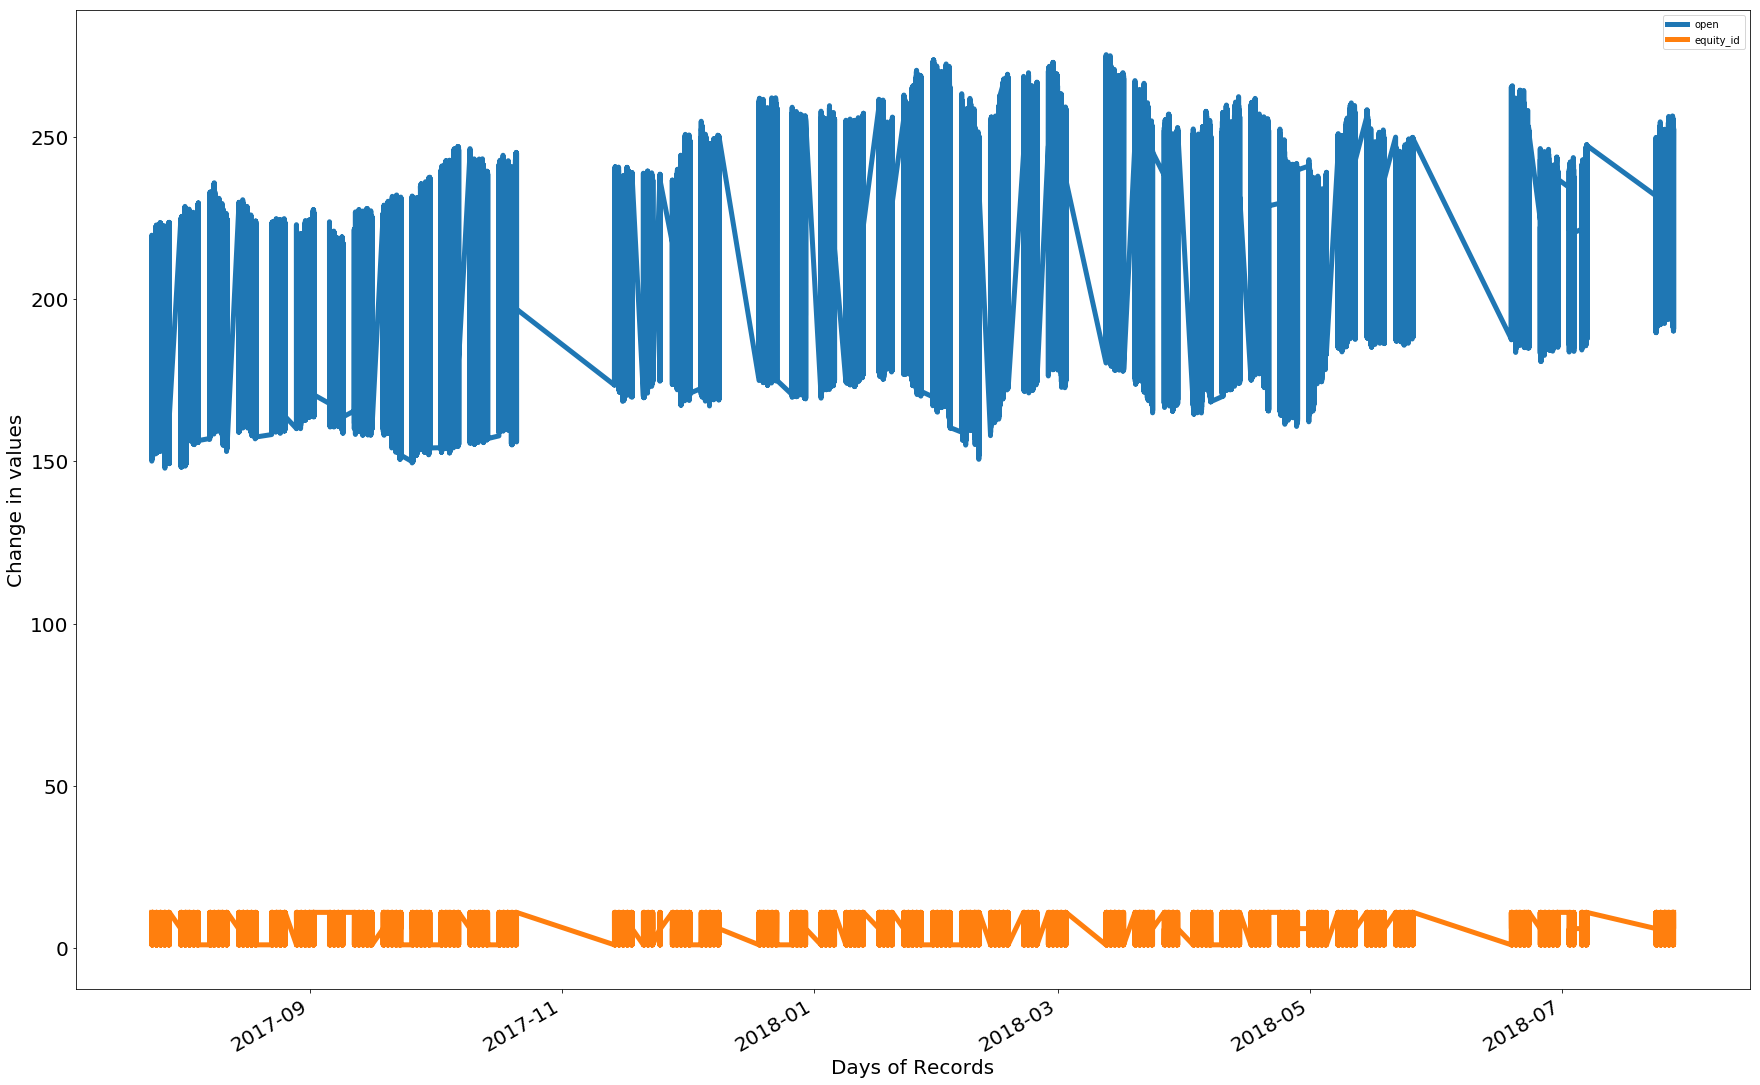

In [162]:
plot=df.plot(figsize=(30,20), linewidth=5, fontsize=20)
plt.xlabel('Days of Records', fontsize=20);
plt.ylabel('Change in values', fontsize=20);

fig = plot.get_figure()
fig.savefig("output.png")

In [ ]:
#Graph with length of 20 and 30 length.
#graph line is 5 and font size is 20.
#setting up x and y label, showed in graph.
#vertical y axis showing the number of values.
#horizontal x axis showing timestamp.
#blue line is for open and yellow line is about equity_id

#this graph is showing how our data is spread over the time. it is also showing the change in the data over the time.

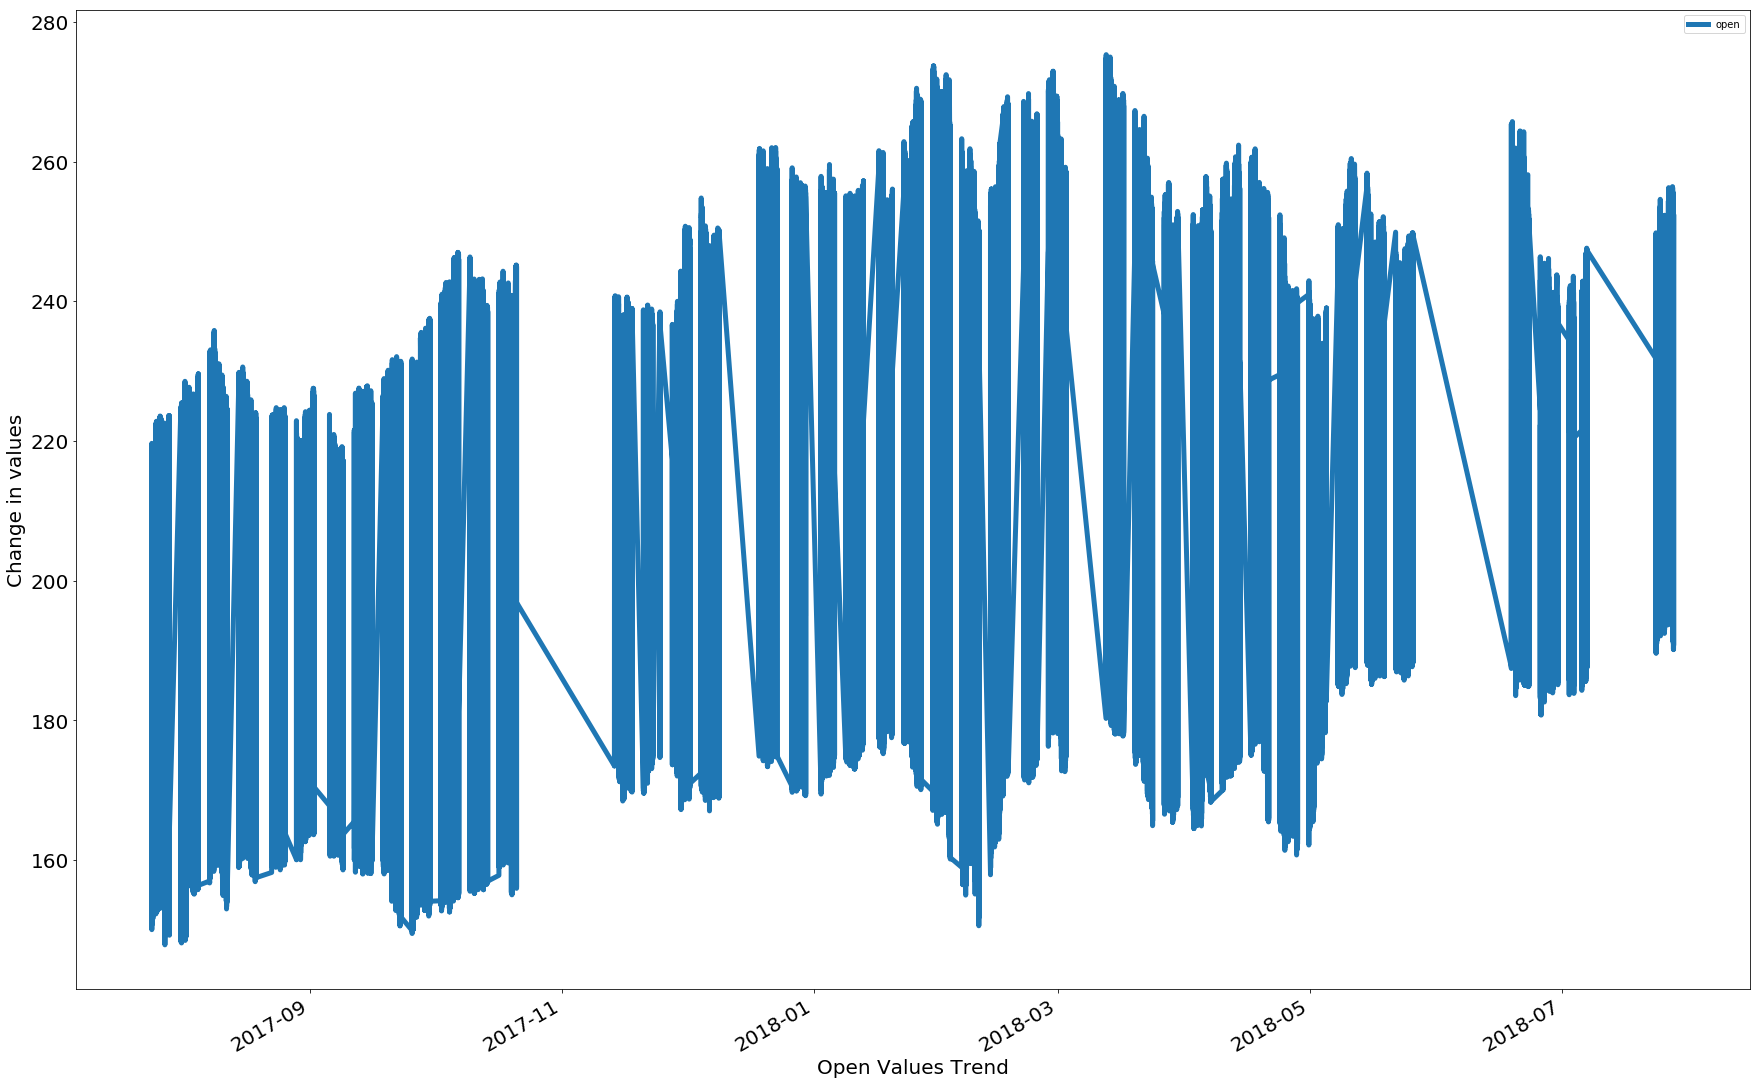

In [163]:
plot=df[['open']].plot(figsize=(30,20), linewidth=5, fontsize=20)
plt.xlabel('Open Values Trend', fontsize=20);
plt.ylabel('Change in values', fontsize=20);
fig = plot.get_figure()
fig.savefig("open.png")

In [ ]:
#Graph with length of 20 and 30 length.
#graph line is 5 and font size is 20.
#setting up x and y label, showed in graph.
#vertical y axis showing the number of values.
#horizontal x axis showing timestamp.
#blue line is for open.

#this graph is about the open cloumn only. we can see our values in 2017-09 starts from 154 and changes day by day.
#in 2017-11 it rise til 240. and other trends can be seen in the graph.

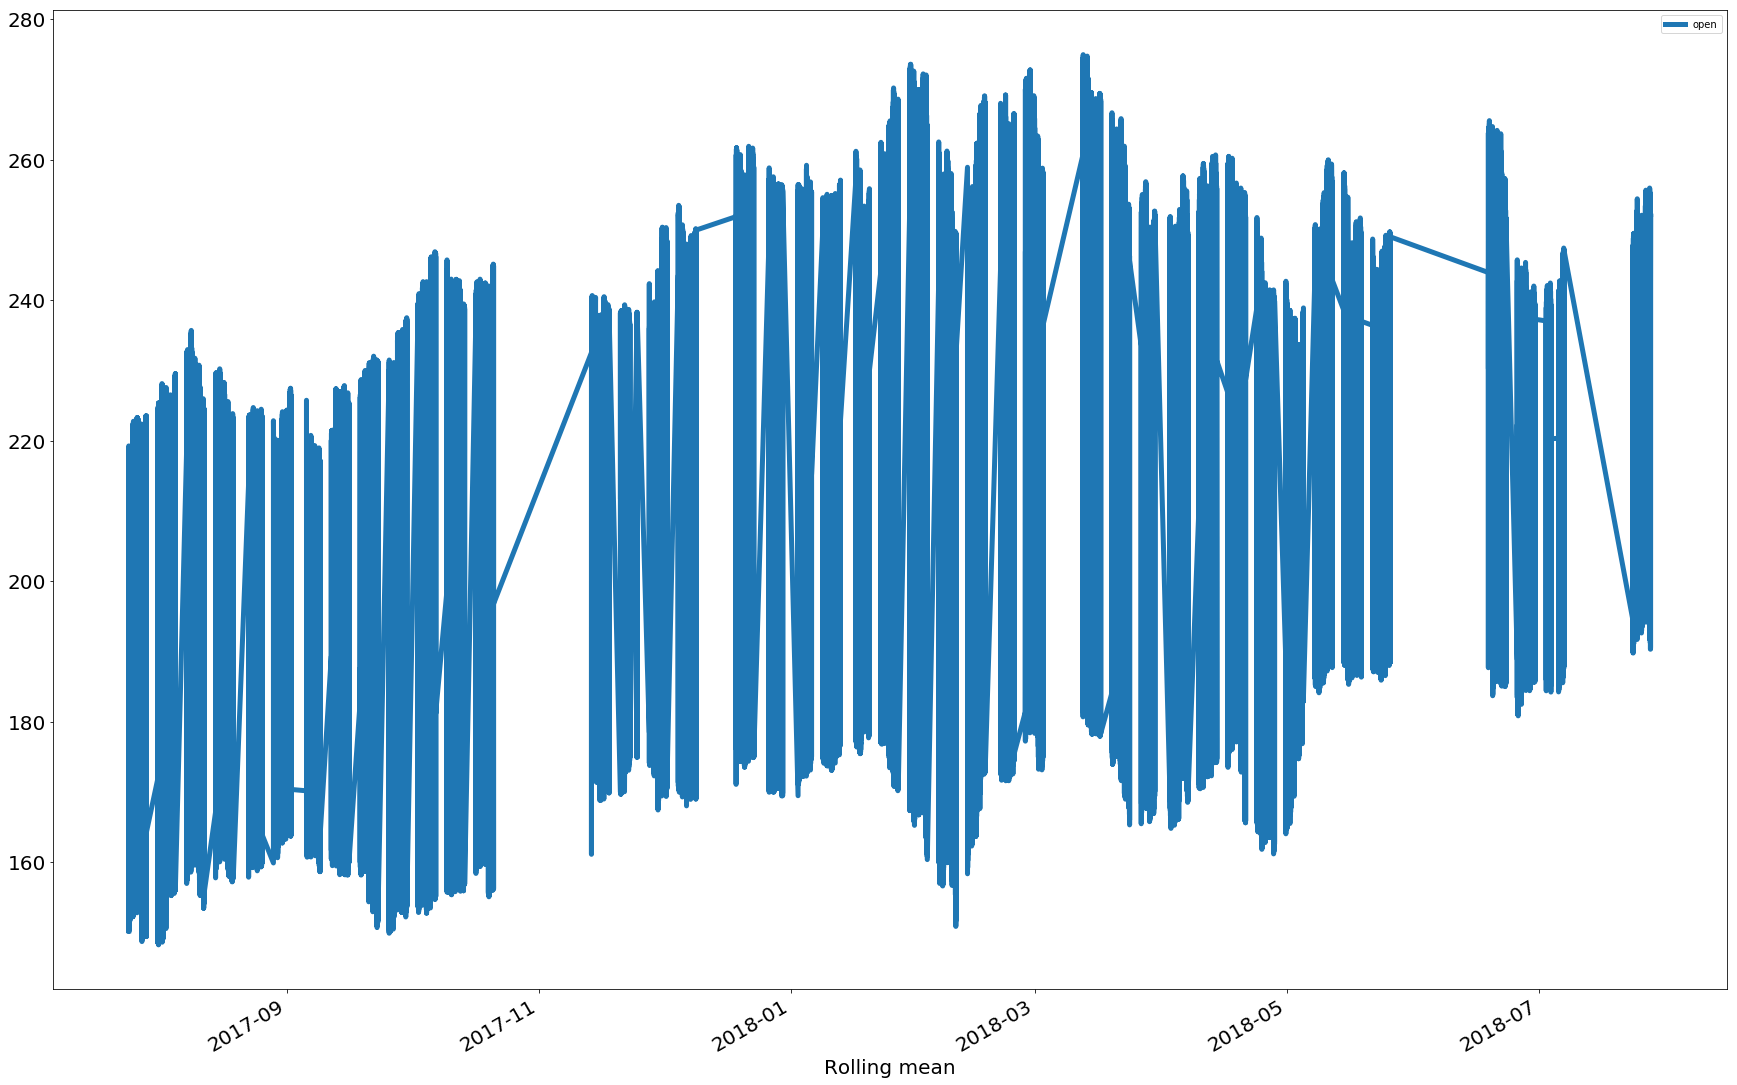

In [164]:
open = df[['open']]
plot=open.rolling(12).mean().plot(figsize=(30,20), linewidth=5, fontsize=20)
plt.xlabel('Rolling mean', fontsize=20);
fig = plot.get_figure()
fig.savefig("rooling mean.png")

In [ ]:
#Calculate the rolling mean of the values,setting open column under review by sending as parameter.

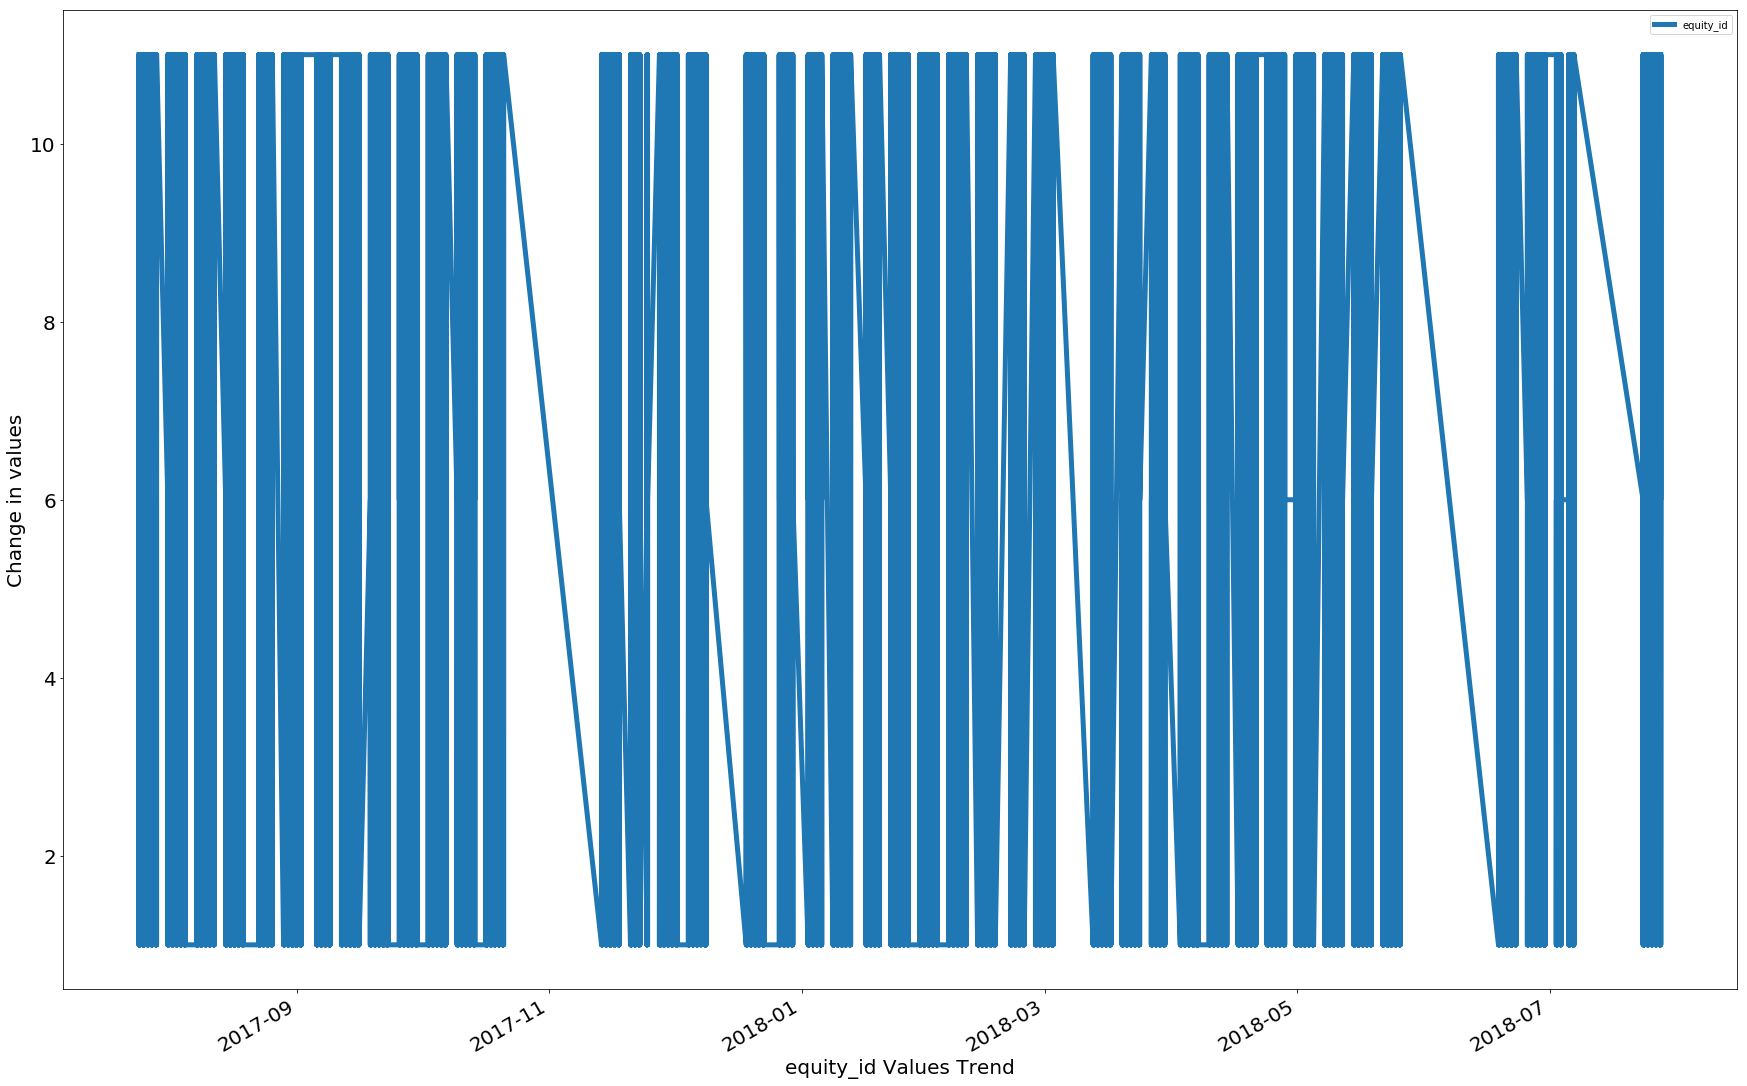

In [165]:
plot=df[['equity_id']].plot(figsize=(30,20), linewidth=5, fontsize=20)
plt.xlabel('equity_id Values Trend', fontsize=20);
plt.ylabel('Change in values', fontsize=20);
fig = plot.get_figure()
fig.savefig("equity_id.png")

In [135]:
#Works same  as open column is described above.

In [ ]:
#These are 2.2 million records. so its value change trend on each miute basis is not possible.
#We are going to resample the data on 30 minutes.

In [166]:
df=df.resample('30T').mean()
df.head()

,open,equity_id
datetime,,
2017-07-24 15:30:00,178.991853,6.0
2017-07-24 16:00:00,179.166363,6.0
2017-07-24 16:30:00,179.142519,6.0
2017-07-24 17:00:00,178.738857,6.0
2017-07-24 17:30:00,178.909568,6.0


In [167]:
df.equity_id.unique()

array([6.        ,        nan, 7.21621622, 7.25      , 6.83333333,
       5.93006993, 5.94871795])

In [168]:
#we can see when we resample dataset on 30 minutes interval, equity_id which were only three values before,
#Now they are spread on a large scale of number in points. still there boundaries are from 1-6-11

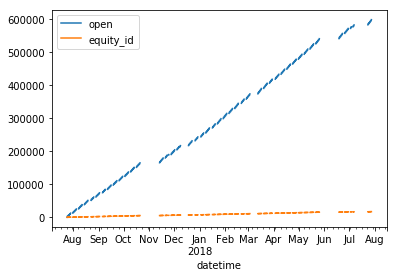

In [169]:
df=df.cumsum()
df.plot()

In [93]:
#There is a linear incrase in open values. apart equity_id have small change

In [94]:
#4. Using this definition and the indicator, calculate it for the given dataset.

In [170]:
WINDOW = 30  # 30 minutes, you can change to any window you want. Has to match resolution from resample

In [171]:
df['change'] = df['equity_id'].pct_change(periods=WINDOW);
print (df.head(10))
print (df.change)

#here down first print is just to make sure we have created the change column and values are calulated.
#Second print is about measuring change indicator by each 30 minutes.
#our intial values are very small chnage that's why it shows NAN, later on our script enters the change as shown below.

                            open  equity_id  change
datetime                                           
2017-07-24 15:30:00   178.991853        6.0     NaN
2017-07-24 16:00:00   358.158217       12.0     NaN
2017-07-24 16:30:00   537.300736       18.0     NaN
2017-07-24 17:00:00   716.039592       24.0     NaN
2017-07-24 17:30:00   894.949160       30.0     NaN
2017-07-24 18:00:00  1073.922849       36.0     NaN
2017-07-24 18:30:00  1252.944090       42.0     NaN
2017-07-24 19:00:00  1432.064609       48.0     NaN
2017-07-24 19:30:00  1610.551012       54.0     NaN
2017-07-24 20:00:00  1789.411200       60.0     NaN
datetime
2017-07-24 15:30:00         NaN
2017-07-24 16:00:00         NaN
2017-07-24 16:30:00         NaN
2017-07-24 17:00:00         NaN
2017-07-24 17:30:00         NaN
2017-07-24 18:00:00         NaN
2017-07-24 18:30:00         NaN
2017-07-24 19:00:00         NaN
2017-07-24 19:30:00         NaN
2017-07-24 20:00:00         NaN
2017-07-24 20:30:00         NaN
2017-07-24 21:0

In [ ]:
#Here we can see the change in each 30 minutes.

In [172]:
df['open'].corr(df['equity_id'])

0.9994240382654639

In [142]:
#0.99 is the coorelation between open and equity_id 

In [176]:
df['open'].var()

30554407171.853687

In [174]:
print (df.equity_id.head(10))

datetime
2017-07-24 15:30:00     6.0
2017-07-24 16:00:00    12.0
2017-07-24 16:30:00    18.0
2017-07-24 17:00:00    24.0
2017-07-24 17:30:00    30.0
2017-07-24 18:00:00    36.0
2017-07-24 18:30:00    42.0
2017-07-24 19:00:00    48.0
2017-07-24 19:30:00    54.0
2017-07-24 20:00:00    60.0
Freq: 30T, Name: equity_id, dtype: float64


In [175]:
df['equity_id'].var()

24621082.338549707

In [ ]:
#Variance in both cloumns are shown above

In [ ]:
#Conclusion
#Based on my analysis i recommend linear regression for trading.
#Our Exploratory data analysis showing linear relationship.
#Our equity_id and open are also numeric values

In [ ]:
#This is the count(Occurance of the unique number) of the values in open.

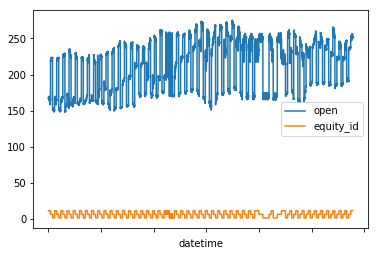

In [102]:
df.plot()

In [87]:
df=df.set_index('datetime')
df

,id,open,equity_id
datetime,,,
2017-07-24 15:30:00+02,382964,168.3700,11
2017-07-24 15:31:00+02,382965,167.9000,11
2017-07-24 15:32:00+02,382966,168.0600,11
2017-07-24 15:33:00+02,382967,167.9800,11
2017-07-24 15:34:00+02,382968,168.0900,11
2017-07-24 15:35:00+02,382969,168.1300,11
2017-07-24 15:36:00+02,382970,168.2074,11
2017-07-24 15:37:00+02,382971,168.2500,11
2017-07-24 15:38:00+02,382972,168.2300,11
